In [2]:
import torch 
import math
import matplotlib.pyplot as plt

In [3]:
# True Solution
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

p = torch.tensor([1, 2, 3]) # Polynomial order
xx = x.unsqueeze(-1).pow(p) # X vals before weights

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1), # Weights for order p?
    torch.nn.Flatten(0, 1) # Bias? 
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [4]:
learning_rate = 1e-03
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99: 
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} xx^2 + {linear_layer.weight[:, 2].item()} x^3')

99 5071.43408203125
199 1445.4818115234375
299 595.8756103515625
399 452.7725830078125
499 416.5078125
599 389.4664611816406
699 362.55517578125
799 335.432373046875
899 308.3287353515625
999 281.53228759765625
1099 255.333251953125
1199 229.99903869628906
1299 205.76239013671875
1399 182.81533813476562
1499 161.3089599609375
1599 141.35394287109375
1699 123.0224838256836
1799 106.35041809082031
1899 91.3411865234375
1999 77.96788024902344
Result: y = -1.9765005276894954e-07 + 0.6012364625930786 x + 3.690350425245015e-08 xx^2 + -0.05621010437607765 x^3


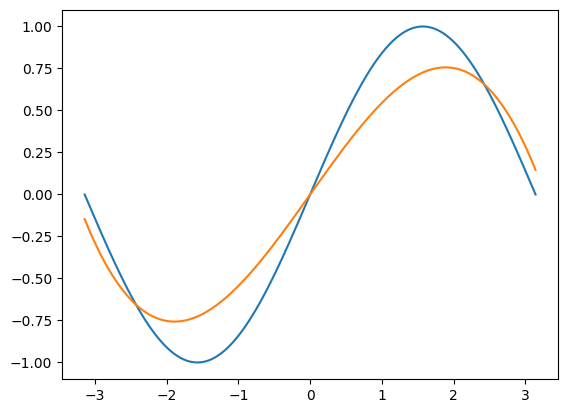

In [5]:
plt.figure()
plt.plot(x, y)
plt.plot(x, y_pred.data.numpy())
plt.show()